# More Python Classification Problems #

## Part 1: ## 

On the [class Github page](https://github.com/aleahy-work/STAT223-S24) is the 'penguins.csv' dataset, which gives various body measurements for 344 penguins spanning three species.  

In each case below, you should use the appropriate tools in SKLearn to produce and evaluate a predictive model for the specified output variable given the specified input variables.  In addition, you should

1. produce a train-test split with 25% of the data belonging to the test dataset.
2. produce a model for the data using the train dataset
3. evaluate the model based on its test dataset 

**Note** that this dataset also has NA values and that you will have to handle all subsetting (see pandas ".dropna") and potentially transposing.

### Task 1: Adele Penguins ##

Use a k-Nearest Neighbor model to predict sex as a function of body mass and bill length **for the *Adele penguins***.  In particular, you should:

1. Produce a scatter plot of the data, showing sex with color

2. Try the parameters $k = 3,5,7$ and determine which leads to the best accuracy on the test data.

3. You get to choose $k$, but you should normalize the input variables using the $z = (x - \mu)/\sigma$ transformation first.  Do it by hand or use the [SKLearn standard scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

4.  Redo problem 2 using the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) from SKLearn and compare your answers to problem 3.

### Task 2: All Penguins with a decision tree and naive Bayes ###

5. Produce a classifier model of the sex of **all** the penguins using a decision tree (the default parameters should be sufficient) for body mass and bill length.  Try this with a *naive Bayes* classifier and compare your accuracy on the test set to the decision tree.  (Food for thought: Does it matter if the data is scaled?)

## Part 2 ##

The purpose of this problem is to give you sense of how to use classification algorithms on images.  It makes use of the built-in digits dataset in SKLearn discussed [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).  The dataset consists of 1797 vectors of length 64 for predictor variables, and 1797 digits 0-9 which give the corresponding output numbers the images are supposed to represent.  The idea is that the length 64 vector can be resized into an 8x8 4-bit grayscale image (i.e., 16 shades of gray), which is a digitization of a handwritten digit. 

The dataset can be loaded and a sample image-number pair visualized as follows.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
myX, myy = load_digits(return_X_y = True)

In [3]:
myX.shape

(1797, 64)

**Note:** Each of the 1797 images is stored as a vector of length 64 with each entry having values 0 through 15, where the number represents the intensity of gray (0=black, 15=white) for a given pixel. The vector is supposed to represent an 8x8 image which represents a digit 0, 1, ..., 9.  We can convert the vector of length 64 to an 8x8 array using reshape and display the image (along with the associated digit) using matplotlib's .imshow function as follows. 

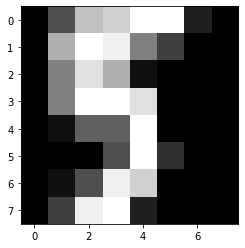

5

In [9]:
#
# .reshape(8,8) converts the length-64 vector to an 8x8 array that can be displayed with 
# matplotlib using imshow.  This code displays the image and also right below it the corresponding 
# digit for the 15th image in the array.
#
plt.imshow(myX[15].reshape(8,8), cmap='gray')
plt.show()
myy[15]

In [7]:
myX[15]  # This displays the numerical contents of the image as a length-64 vector 

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

In [8]:
myX[15].reshape(8,8)  
# this shows the image as an 8x8 numerical array; you can see the outline of the digit, with
# higher values denoting lighter colors

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

### Task 1: Distinguishing between 0s and 1s ###

**Note:** The following cells create a *new* pair of numpy arrays (myXs, myys) from the (myX, myy) digits dataset that consists only of the digits 0 and 1 and their corresponding images. 

In [ ]:
myXs = myX[(myy == 0) | (myy == 1)]
myys = myy[(myy == 0) | (myy == 1)]

Do a train-test split and use the training data to create *three* different classifiers to classify the (myXs, myys) 0-1 digit data using the following classifiers in SKLearn:

1. Logistic Regression
2. k-Nearest Neighbor
3. Decision Tree

You should also:

+ Offer an explanation for why the predictor variables do not need to be scaled for any of these models.
+ Produce a named vector of predicted outputs for the traning data, say, kpredict, svcpredict, cartpredict--these vectors will be used in the next step
+ In each case, produce a confusion matrix and accuracy score for the classifier


### Task 2: Making a simple ensemble classifier ###

Explain why the following code is an ensemble classifier of the three models you produced above (explain how the classifer works) and use it to produce a confusion matrix for the ensemble model:

In [ ]:
ensemblepredict = np.where(kpredict + svcpredict + cardpredict < 2, 0, 1)

**Hints:** Do a google search to understand what the numpy '.where' function does. 

### Task 3: Classify all digits ###

Repeat the same task as Task 1 with the *full* digits dataset (myX, myy) that you imported above, classifying each of the nine digits 0-9 in the test_X dataset and comparing your answersto test_y using a confusion matrix as before. 

### Task 4: Make a classifier for ALL of the digits ###

Depending on the test-train split, at least one of your classifiers in the above should have inaccurate classifications. Choose one model that does have inaccurate classifications and produce an image of several of the digits that were misclassified.  The following sample of code may or may not be helpful as far as identifying which images were misclassified. (Google the numpy '.nonzero()' function to understand what it does.)  

In [ ]:
(mymodelpredict - test_y).nonzero()

### Task 5: Classify using a random forest ###

Create a prediction model for the digits using a random forest classifier.  The default parameters should be sufficient. Make a confusion matrix and compare your accuracy to the accuracy from the previous tasks.  **Also** use the '.predict_proba()' method to find the closest election results produced by the random forest.  (No need to identify the image but you can produce an image of this .)  